In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv('./Train_X.csv',encoding= 'cp950')
df_test = pd.read_csv('./Test_X.csv',encoding= 'cp950')

In [29]:
df = df.sort_values('日期')

In [30]:
stock_list = (df['股票代號'].unique()).tolist()

In [31]:
#df[df['股票代號']==stock_list[0]]['收盤價']

In [32]:
data = {}
dftest={}
for name in stock_list:
    data[name]=df[df['股票代號']==name].loc[:,['開盤價', '最高價','最低價','收盤價','成交量.股.']]
    dftest[name]=df_test[df_test['股票代號']==name].loc[:,['開盤價', '最高價','最低價','收盤價','成交量.股.']]

In [33]:
#定義正規化函式
def normalize(train):
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm

a= normalize(data['TWA00'])
b = normalize(dftest['TWA00'])

In [34]:
#定義餵入的feature跟label序列
def train_(df, ref_day=10, predict_day=1):
    X_train, Y_train = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        X_train.append(np.array(df.iloc[i:i+ref_day,:-1]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]['收盤價']))
    return np.array(X_train), np.array(Y_train)

In [45]:
X,Y=train_(a,15,1)
split_boundary = int(X.shape[0] * 0.7)
train_x = X[: split_boundary]
test_x = X[split_boundary:]
train_y = Y[: split_boundary]
test_y = Y[split_boundary:]

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()
regressor.add(LSTM(units = 250, return_sequences = True, input_shape = (train_x.shape[1], train_x.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 250, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 250, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 250))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(train_x, train_y, epochs = 100, batch_size = 32)

Epoch 1/100
154/154 [==============================] - 6s 36ms/step - loss: 0.0349
Epoch 2/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0179
Epoch 3/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0141
Epoch 4/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0169
Epoch 5/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0114
Epoch 6/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0115
Epoch 7/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 8/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 9/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 10/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0094
Epoch 11/100
154/154 [==============================] - 2s 10ms/step - loss: 0.0083
Epoch 12/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 13/10

154/154 [==============================] - 2s 11ms/step - loss: 0.0031
Epoch 99/100
154/154 [==============================] - 2s 11ms/step - loss: 0.0030
Epoch 100/100
154/154 [==============================] - 2s 11ms/step - loss: 0.0034


In [37]:
#估算test
regressor.evaluate(test_x,test_y)

70/70 [==============================] - 1s 11ms/step


0.00610218049426164

In [51]:
a[150:]

,開盤價,最高價,最低價,收盤價,成交量.股.
255687,0.196669,0.174972,0.167873,0.170454,-0.070968
253976,0.180363,0.158611,0.134286,0.120250,-0.076091
252265,0.153809,0.183895,0.179805,0.198790,0.113627
250554,0.223519,0.214680,0.225863,0.232721,0.070867
248842,0.230271,0.210406,0.202075,0.206148,0.011383
247130,0.219563,0.281961,0.242986,0.303274,0.145964
245418,0.313141,0.304425,0.316893,0.311338,-0.030641
243702,0.313951,0.311785,0.329986,0.313898,0.064291
241984,0.338878,0.368807,0.360195,0.384129,0.330433
240266,0.395669,0.377144,0.380841,0.378595,0.322009


In [52]:
test_x[1]

array([[0.21956335, 0.28196108, 0.24298642, 0.30327446],
       [0.3131413 , 0.30442465, 0.31689266, 0.31133768],
       [0.31395116, 0.31178489, 0.32998584, 0.31389767],
       [0.33887777, 0.3688072 , 0.36019503, 0.38412892],
       [0.39566932, 0.37714411, 0.3808405 , 0.37859503],
       [0.36498023, 0.35193022, 0.35948155, 0.34632683],
       [0.37634944, 0.40077188, 0.39561872, 0.40518373],
       [0.39911902, 0.37810516, 0.33123064, 0.31831252],
       [0.34556692, 0.34070234, 0.3378038 , 0.35711867],
       [0.34936704, 0.32818525, 0.33211111, 0.34067032],
       [0.35457663, 0.33727225, 0.31420572, 0.32461286],
       [0.3590075 , 0.34863296, 0.36072635, 0.34517713],
       [0.32667534, 0.30541696, 0.27120696, 0.28603665],
       [0.3000122 , 0.28231269, 0.28175741, 0.25947095],
       [0.25979946, 0.244988  , 0.2060295 , 0.18300068]])

In [38]:
test_y

array([[ 0.34517713],
       [ 0.28603665],
       [ 0.25947095],
       [ 0.18300068],
       [ 0.1786165 ],
       [ 0.1141874 ],
       [ 0.16153198],
       [ 0.19361623],
       [ 0.19623754],
       [ 0.11514548],
       [ 0.07701382],
       [ 0.08743008],
       [ 0.02082422],
       [ 0.00413827],
       [-0.01813522],
       [-0.01341379],
       [ 0.00447551],
       [-0.00707512],
       [ 0.09340085],
       [ 0.08486242],
       [ 0.04322035],
       [-0.0224121 ],
       [-0.0137817 ],
       [-0.20926875],
       [-0.16558021],
       [-0.25209885],
       [-0.26882313],
       [-0.36141983],
       [-0.24625071],
       [-0.25276567],
       [-0.18057228],
       [-0.19418471],
       [-0.25938027],
       [-0.27335294],
       [-0.16162525],
       [-0.06188508],
       [-0.07384961],
       [-0.0074047 ],
       [ 0.01566591],
       [ 0.00364773],
       [-0.01672493],
       [-0.07158853],
       [-0.05503288],
       [ 0.05024884],
       [ 0.03810802],
       [-0

In [39]:
test_x

array([[[ 0.37634944,  0.40077188,  0.39561872,  0.40518373],
        [ 0.39911902,  0.37810516,  0.33123064,  0.31831252],
        [ 0.34556692,  0.34070234,  0.3378038 ,  0.35711867],
        [ 0.34936704,  0.32818525,  0.33211111,  0.34067032],
        [ 0.35457663,  0.33727225,  0.31420572,  0.32461286]],

       [[ 0.39911902,  0.37810516,  0.33123064,  0.31831252],
        [ 0.34556692,  0.34070234,  0.3378038 ,  0.35711867],
        [ 0.34936704,  0.32818525,  0.33211111,  0.34067032],
        [ 0.35457663,  0.33727225,  0.31420572,  0.32461286],
        [ 0.3590075 ,  0.34863296,  0.36072635,  0.34517713]],

       [[ 0.34556692,  0.34070234,  0.3378038 ,  0.35711867],
        [ 0.34936704,  0.32818525,  0.33211111,  0.34067032],
        [ 0.35457663,  0.33727225,  0.31420572,  0.32461286],
        [ 0.3590075 ,  0.34863296,  0.36072635,  0.34517713],
        [ 0.32667534,  0.30541696,  0.27120696,  0.28603665]],

       ...,

       [[ 0.17843172,  0.17250294,  0.18258322,  0.

In [40]:
test_y

array([[ 0.34517713],
       [ 0.28603665],
       [ 0.25947095],
       [ 0.18300068],
       [ 0.1786165 ],
       [ 0.1141874 ],
       [ 0.16153198],
       [ 0.19361623],
       [ 0.19623754],
       [ 0.11514548],
       [ 0.07701382],
       [ 0.08743008],
       [ 0.02082422],
       [ 0.00413827],
       [-0.01813522],
       [-0.01341379],
       [ 0.00447551],
       [-0.00707512],
       [ 0.09340085],
       [ 0.08486242],
       [ 0.04322035],
       [-0.0224121 ],
       [-0.0137817 ],
       [-0.20926875],
       [-0.16558021],
       [-0.25209885],
       [-0.26882313],
       [-0.36141983],
       [-0.24625071],
       [-0.25276567],
       [-0.18057228],
       [-0.19418471],
       [-0.25938027],
       [-0.27335294],
       [-0.16162525],
       [-0.06188508],
       [-0.07384961],
       [-0.0074047 ],
       [ 0.01566591],
       [ 0.00364773],
       [-0.01672493],
       [-0.07158853],
       [-0.05503288],
       [ 0.05024884],
       [ 0.03810802],
       [-0

In [41]:
predict_y = regressor.predict(test_x)

In [42]:
def denormalize(train):
    denorm = train*(np.max(data['TWA00']['收盤價'])-np.min(data['TWA00']['收盤價']))+np.mean(data['TWA00']['收盤價'])
    return denorm

In [43]:
test_y = pd.DataFrame(test_y)
test_y = denormalize(test_y)
z = denormalize(predict_y)

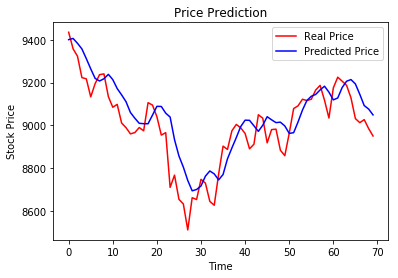

In [44]:
import matplotlib.pyplot as plt 
plt.plot(test_y, color = 'red', label = 'Real Price')  # 紅線表示真實股價
plt.plot(z, color = 'blue', label = 'Predicted Price')  # 藍線表示預測股價
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()